In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/nyc_slender_top5000.csv")

In [110]:
df.head(10)

,address,numfloors,HEIGHTROOF,bldgfront,bldgdepth,latitude,longitude,year,slenderness,boro,borough,col
0,111 WEST 57 STREET,82.0,1428.000000,63.00,200.83,40.764952,-73.977571,2015,17.266254,1,Manhattan,#E2626B
1,111 MURRAY STREET,63.0,784.000000,60.00,60.00,40.715407,-74.012593,2016,11.879046,1,Manhattan,#E2626B
2,161 MAIDEN LANE,57.0,646.000000,105.00,46.00,40.705500,-74.004768,2016,11.520341,1,Manhattan,#E2626B
3,22 THAMES STREET,71.0,900.000000,96.82,76.82,40.709103,-74.012769,2016,10.826800,1,Manhattan,#E2626B
4,432 PARK AVENUE,90.0,1397.000000,200.00,275.00,40.761500,-73.971797,2012,10.161399,1,Manhattan,#E2626B
5,30 EAST 31 STREET,42.0,479.000000,36.00,99.00,40.745457,-73.983973,2017,9.986762,1,Manhattan,#E2626B
6,220 CENTRAL PARK SOUTH,70.0,952.000000,75.00,200.00,40.766958,-73.980567,2015,9.915096,1,Manhattan,#E2626B
7,43 PARK PLACE,43.0,643.000000,93.70,60.00,40.713725,-74.009794,2017,9.458717,1,Manhattan,#E2626B
8,23 EAST 22 STREET,51.0,624.979813,33.33,197.50,40.740508,-73.988106,2008,9.457846,1,Manhattan,#E2626B
9,277 FIFTH AVENUE,51.0,663.000000,67.00,99.00,40.745633,-73.986203,2017,9.424028,1,Manhattan,#E2626B


In [4]:
borodict = {1:"Manhattan", 2:"Bronx", 3: "Brooklyn", 4:"Queens", 5:"Staten Island"}
df["year"] = df[["yearbuilt", "yearalter1", "yearalter2"]].max(axis=1)
df["slenderness"] = (df["slenderness1"]*df["slenderness2"])**0.5
df["boro"] = df["bbl"] // 1000000000
df["borough"]=df["boro"].apply(lambda x: borodict[x])

In [5]:
df = df.drop(["yearbuilt", "yearalter1", "yearalter2","slenderness1","slenderness2","bbl"], 1)

C:\Users\chadd\AppData\Local\Temp/ipykernel_2592/3524497605.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["yearbuilt", "yearalter1", "yearalter2","slenderness1","slenderness2","bbl"], 1)


In [6]:
col = {"Manhattan":"#E2626B", "Bronx":"#4FBE9E", "Brooklyn":"#4D74B9", "Queens":"#F9B757", "Staten Island":"#343F52"}

df["col"] = df["borough"].apply(lambda x: col[x])

In [107]:
np.log10(list(df.index+1))[0:10]

array([0.        , 0.30103   , 0.47712125, 0.60205999, 0.69897   ,
       0.77815125, 0.84509804, 0.90308999, 0.95424251, 1.        ])

<Figure size 432x288 with 0 Axes>

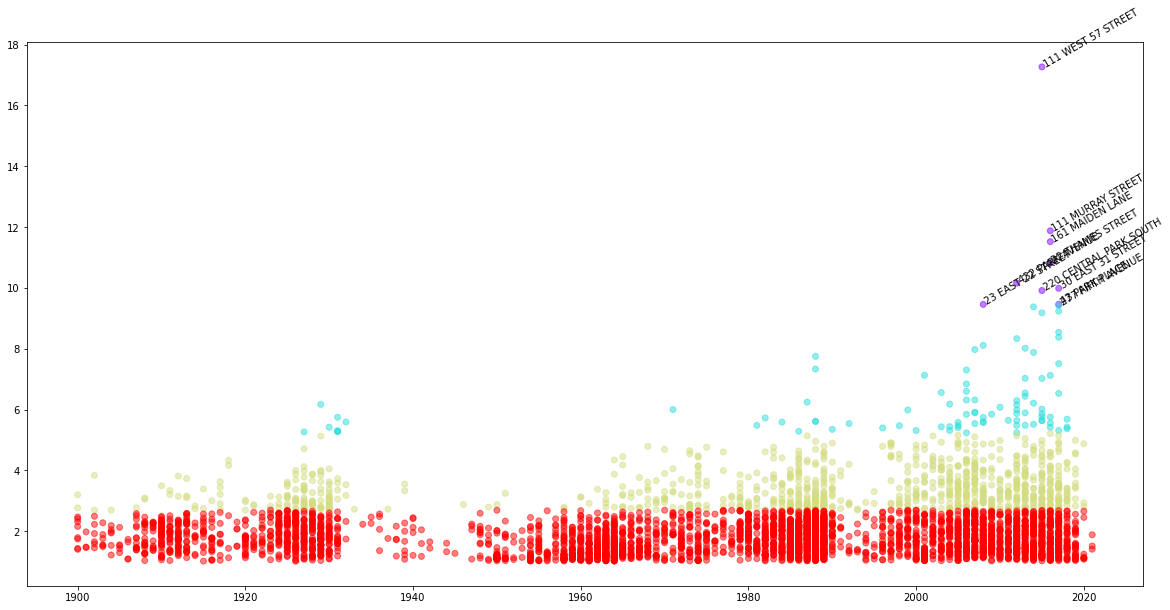

In [109]:
import math

plt.clf()
plt.figure(figsize=(20, 10))
plt.scatter(df.year, df.slenderness, alpha=0.5, c=np.floor(np.log10(list(df.index+1))), cmap='rainbow')


df[['year','slenderness','address']].iloc[0:10].apply(lambda x: plt.text(*x, rotation=30, size=10),axis=1)

plt.savefig("slender.pdf", format="pdf", bbox_inches="tight")
